1. **Import Necessary Modules**

In [1]:
from fastai.vision.all import *

2. **Define Dataset Path**

In [2]:
path = Path('flowers')

3. **Create Data Block**

In [3]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(224, method='squish')]
).dataloaders(path)

4. **Display Sample Data**

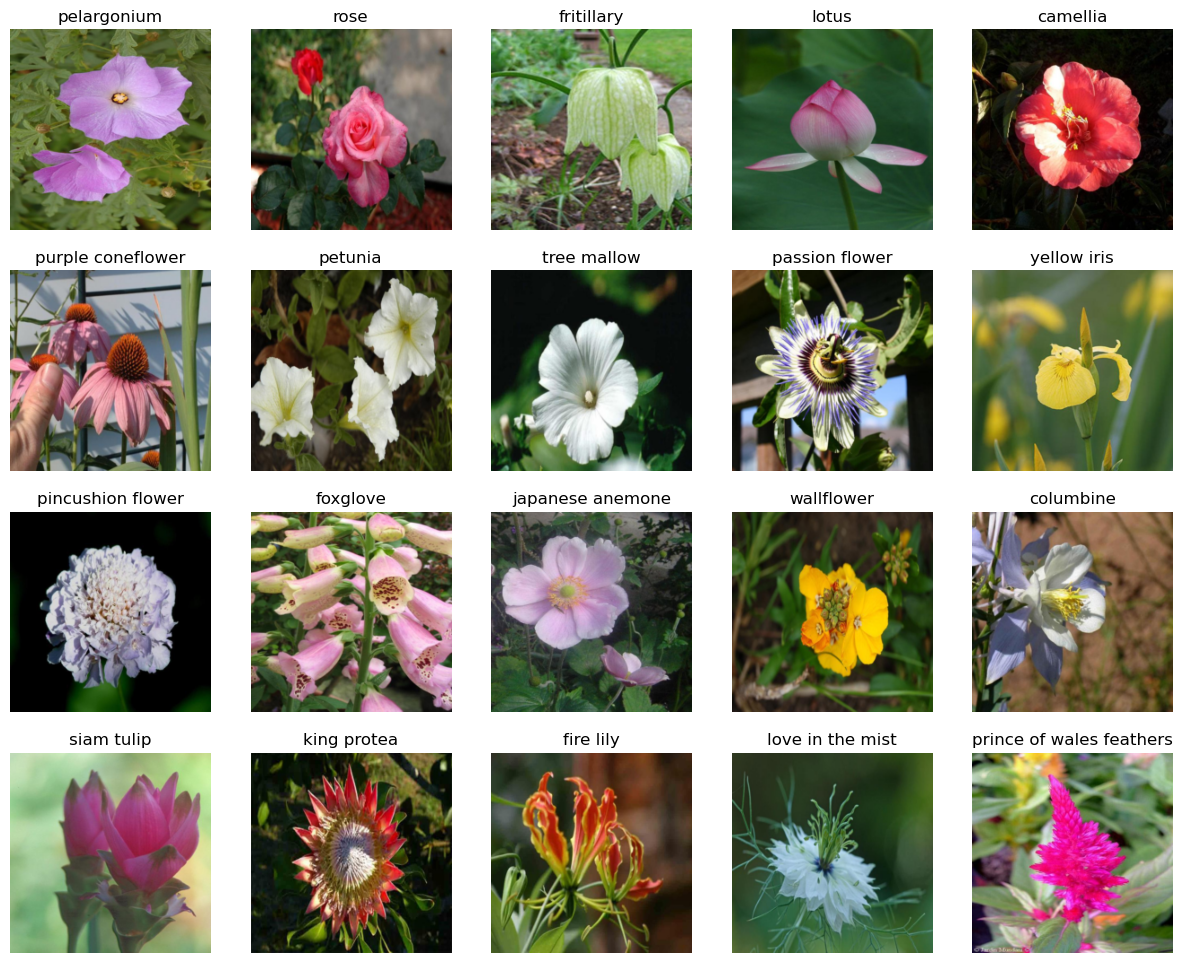

In [4]:
dls.show_batch(max_n=20)

5. **Create Learner and Fine-tune**

In [5]:
learn = vision_learner(dls, densenet121, metrics=accuracy)
learn.fine_tune(10)

6. **Evaluate Model Performance**

In [6]:
final_accuracy = learn.recorder.final_record[2]
print(f"Final Accuracy: {final_accuracy:.2f}")

Final Accuracy: 0.98


7. **Visualize Results**

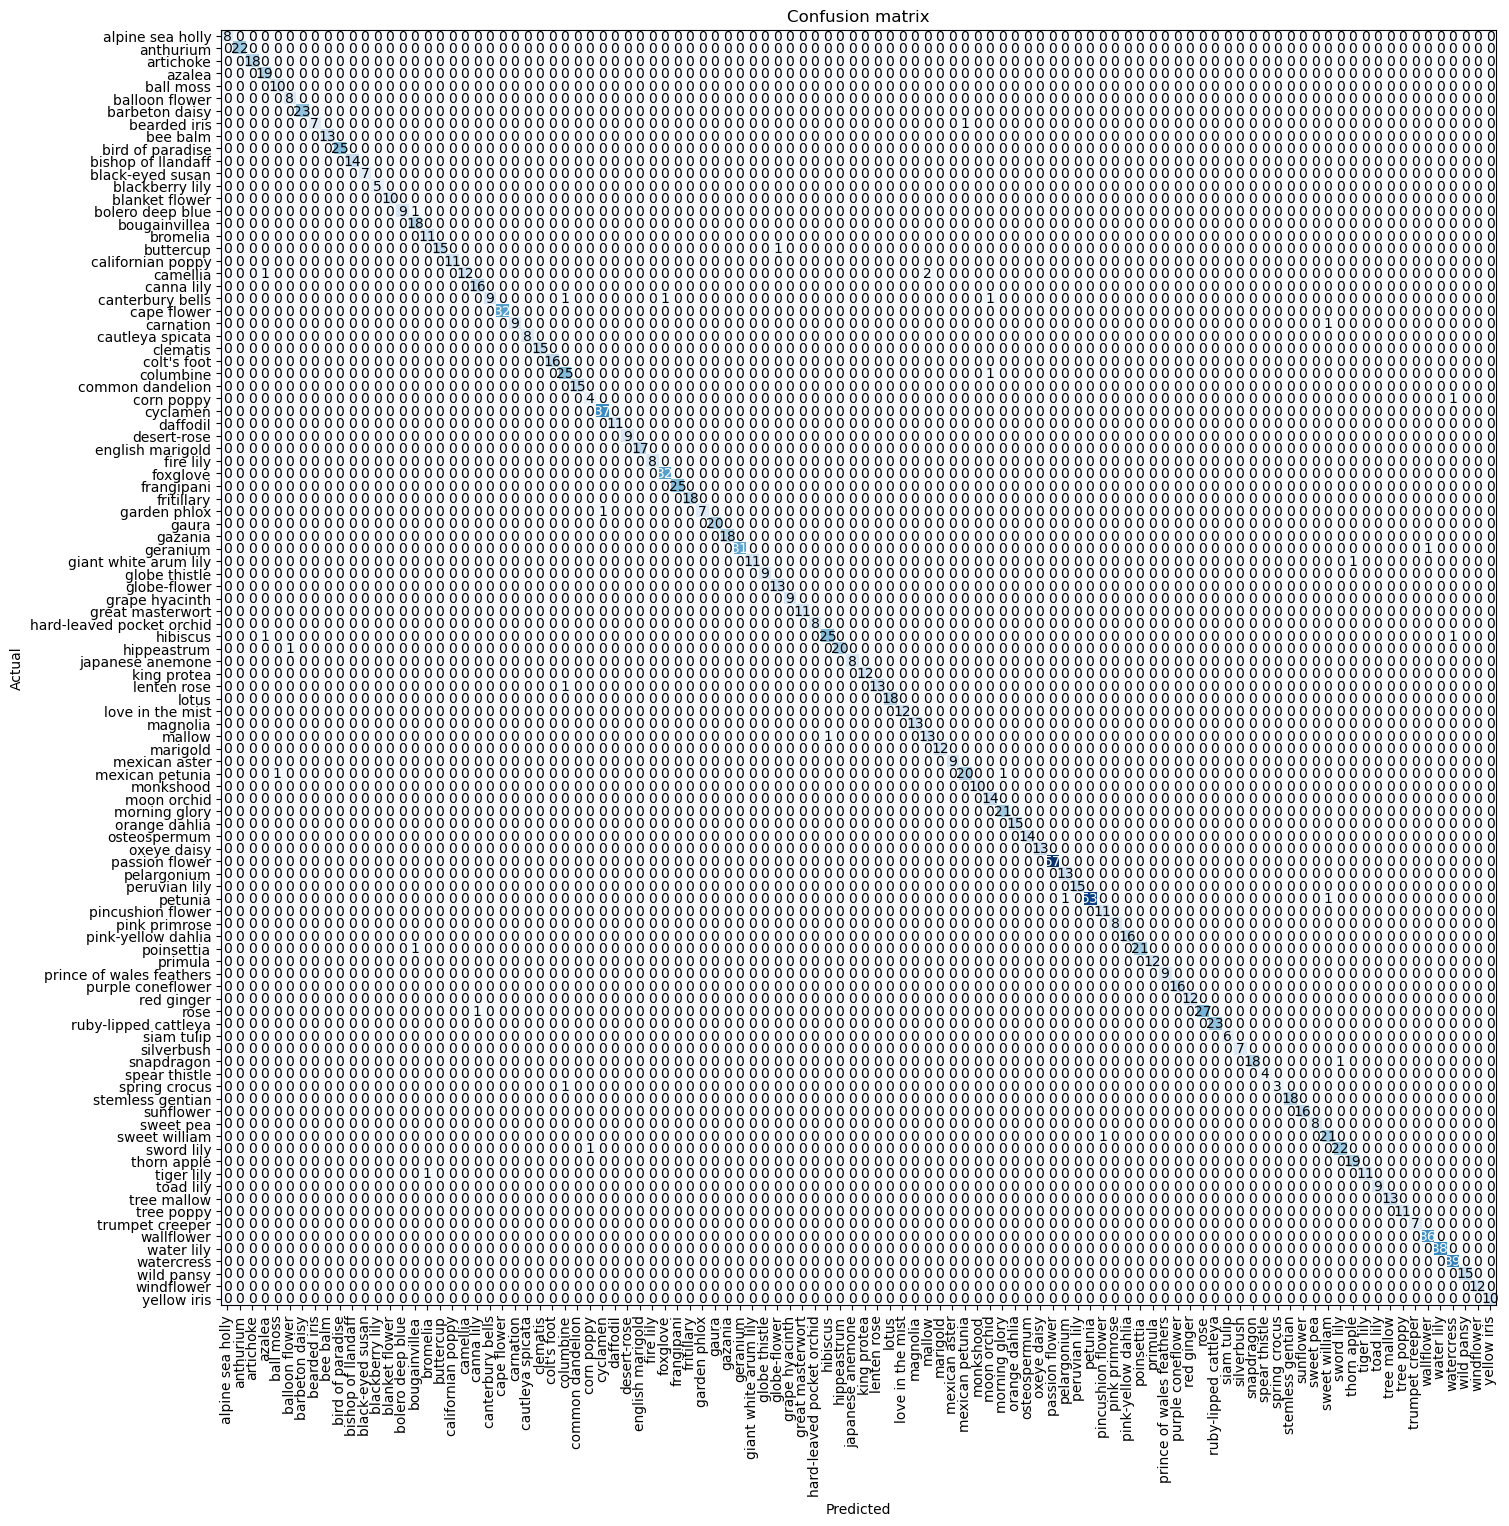

In [7]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(15, 20))

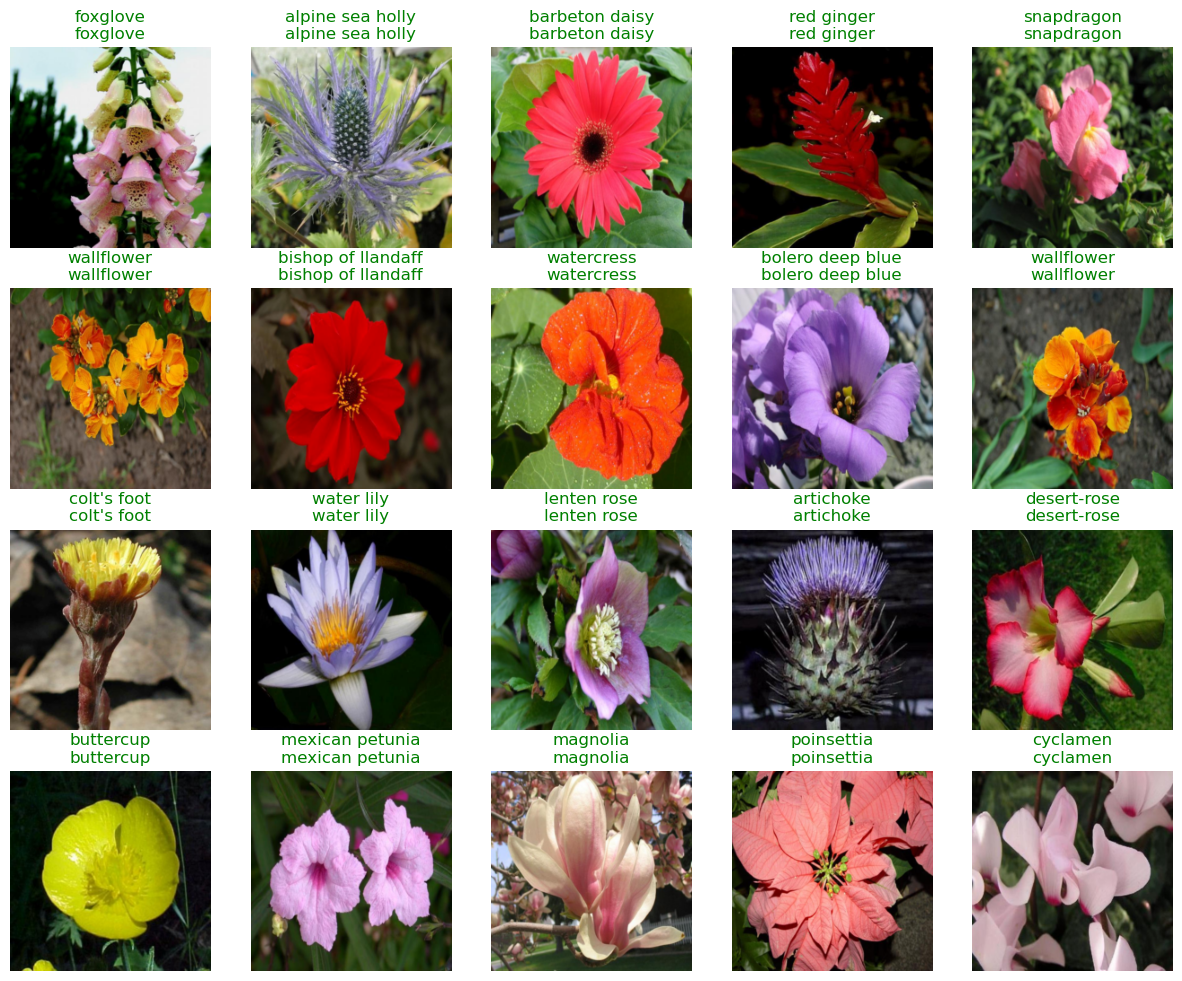

In [8]:
learn.show_results(max_n=20)

8. **Export Model**

In [9]:
learn.export(f'model.pkl')